# Ejercicio Final Python

### Erick Mendoza, Daniel Rosas, Ricardo Miranda

#### Noviembre, 2018

1. Importa con la librería de pandas, como csv, los datos que vienen aquí:   

In [1]:
##Importamos pandas, numpy y gráficos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##Importamos nuestros datos

##Base Train
train_set=pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv')

##Base test

test_set=pd.read_csv('https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv')


2. Revisa [este sitio](https://datahack.analyticsvidhya.com/contest/) para que entiendas el reto.Busca la documentación que viene sobre el dataset para llenar la misma tabla que llenaste para R, en donde venga la descripción, el tipo de variable, los rangos.

| Nombre Columna | Descripción | Posibles Valores | Tipo de dato |
| -------------- | ----------- | ---------------- | ------------ |
| Loan_ID | ID de prestamo | LP001002.. LP002990 | text |
| Gender | Género | Female, Male | text |
| Married | Casado | No, Yes | Text |
| Dependents | Dependientes | 0,1,2,3,+ | numeric |
| Education | Educación | Graduate, No graduate | text |
| Selft_Employed | Auto empleado | No, Yes | text |
| ApplicantIncome | Ingreso del solicitante | 150.. 81000 | numeric |
| CoapplicantIncome | Ingreso coaplicante | 0...4167 | numeric |
| LoanAmount | Monto de préstamo | 9..700 | numeric |
| Loan_Amount_Term | Plazo de monto prestado | 12..480 | numeric |
| Credit_History | Historial de crédito | 0,1 | numeric |
| Property_Area | Área de propiedad | Rural, Semiurban, Urban | text |

3. ¿Cuántas observaciones se tienen en cada dataset? ¿Cuántas columnas (puedes usar `dataframe.columns`)? ¿Cuáles son los primeros 5 registros?

In [2]:
#Train

print("El número de registros en la base de entrenamiento es: " + str(len(train_set.index)))

print("El número de columnas en la base de entrenamiento es: "+ str(len(train_set.columns)))

print("Los primeros 5 registros de la base entrenamiento son:")

train_set.head()


El número de registros en la base de entrenamiento es: 614
El número de columnas en la base de entrenamiento es: 13
Los primeros 5 registros de la base entrenamiento son:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Test

print("El número de resgistros en la base de prueba es: " + str(len(test_set.index)))

print("El número de columnas en la base de prueba es: " + str(len(test_set.columns)))

print("Los primero 5 registros en la base de prueba son:")

test_set.head()

El número de resgistros en la base de prueba es: 367
El número de columnas en la base de prueba es: 12
Los primero 5 registros en la base de prueba son:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


4. Observa cuántos Nas tienes por columna y por fila (usa la función que vimos para hacerlo para todas las columnas/filas de una vez). Elimina las filas en donde haya valores nulos.

In [4]:
##Entrenamiento
def num_nulos(x):
    return x.isnull().sum()

print("El número de NA's por fila en la base de entrenamiento es: ")
print(train_set.apply(num_nulos,axis=1).sum())

print("El número de NA's por columna en la base de entrenamiento es: ")
print(train_set.apply(num_nulos,axis=0))

#Eliminamos las filas de nulos

train_set=train_set.dropna()

print("Verificamos que ya no tengamos nulos en las filas de la base de entrenamiento: ")
print(train_set.apply(num_nulos,axis=1).sum())

El número de NA's por fila en la base de entrenamiento es: 
149
El número de NA's por columna en la base de entrenamiento es: 
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Verificamos que ya no tengamos nulos en las filas de la base de entrenamiento: 
0


In [5]:
##Test

print("El número de NA's por fila en la base de prueba es: ")
print(test_set.apply(num_nulos,axis=1).sum())

print("El número de NA's por columna en la base de prueba es: ")
print(test_set.apply(num_nulos,axis=0))

#Eliminamos las filas de nulos

test_set=test_set.dropna()

print("Verificamos que ya no tengamos nulos en lasfilas de la base de prueba: ")
print(test_set.apply(num_nulos,axis=1).sum())


El número de NA's por fila en la base de prueba es: 
84
El número de NA's por columna en la base de prueba es: 
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64
Verificamos que ya no tengamos nulos en lasfilas de la base de prueba: 
0


5. Recodifica a 0-1 las variables categóricas que estén siendo tratadas como strings. Usa la función `replace` que vimos, con un diccionario para hacer esto.

In [6]:
train_set.dtypes

new_row_train={
        "Male":0,
        "Female":1,
        "Yes":1,
        "No":0,
        "Graduate":1,
        "Not Graduate":0
        ,"Y":1,
        "N":0
        }

train_set=train_set.replace(new_row_train)

In [7]:
test_set.dtypes

nuevo_row_test=new_row_test={
        "Male":0,
        "Female":1,
        "Yes":1,
        "No":0,
        "Graduate":1,
        "Not Graduate":0
        }

test_set=test_set.replace(new_row_test)

6. Da un resumen de la media, la mediana, desviación estándar, mínimo, máximo de las variables. Adicionalmente usa `df[col_name].value_counts()` para saber cuántas observaciones se tienen para las variables categóricas.

Para las variables categóricas se calcula la distribución por categoría, para las numéricas se calculan sus estadísticos.

In [8]:
##Entrenamiento
train_set.dtypes

train_set.Gender.value_counts()

0    394
1     86
Name: Gender, dtype: int64

In [9]:
train_set.Married.value_counts()


1    311
0    169
Name: Married, dtype: int64

In [10]:
train_set.Dependents.value_counts()


0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
train_set.Education.value_counts()


1    383
0     97
Name: Education, dtype: int64

In [12]:
train_set.Self_Employed.value_counts()


0    414
1     66
Name: Self_Employed, dtype: int64

In [13]:
train_set.ApplicantIncome.describe()


count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [14]:
train_set.CoapplicantIncome.describe()


count      480.000000
mean      1581.093583
std       2617.692267
min          0.000000
25%          0.000000
50%       1084.500000
75%       2253.250000
max      33837.000000
Name: CoapplicantIncome, dtype: float64

In [15]:
train_set.LoanAmount.describe()


count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64

In [16]:
train_set.Loan_Amount_Term.describe()


count    480.000000
mean     342.050000
std       65.212401
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [17]:
train_set.Credit_History.value_counts()


1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [18]:
train_set.Loan_Status.value_counts()

1    332
0    148
Name: Loan_Status, dtype: int64

In [19]:
##Test
test_set.dtypes

test_set.Gender.value_counts()

0    230
1     59
Name: Gender, dtype: int64

In [20]:
test_set.Married.value_counts()

1    187
0    102
Name: Married, dtype: int64

In [21]:
test_set.Dependents.value_counts()

0     167
2      50
1      42
3+     30
Name: Dependents, dtype: int64

In [22]:
test_set.Education.value_counts()

1    224
0     65
Name: Education, dtype: int64

In [23]:
test_set.Self_Employed.value_counts()

0    257
1     32
Name: Self_Employed, dtype: int64

In [24]:
test_set.ApplicantIncome.describe()

count      289.000000
mean      4637.352941
std       4790.683934
min          0.000000
25%       2875.000000
50%       3833.000000
75%       5000.000000
max      72529.000000
Name: ApplicantIncome, dtype: float64

In [25]:
test_set.CoapplicantIncome.describe()

count      289.000000
mean      1528.262976
std       2377.599209
min          0.000000
25%          0.000000
50%        879.000000
75%       2400.000000
max      24000.000000
Name: CoapplicantIncome, dtype: float64

In [26]:
test_set.LoanAmount.describe()

count    289.000000
mean     136.792388
std       59.699582
min       28.000000
25%      102.000000
50%      126.000000
75%      158.000000
max      460.000000
Name: LoanAmount, dtype: float64

In [27]:
test_set.Loan_Amount_Term.describe()

count    289.000000
mean     342.671280
std       65.655503
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [28]:
test_set.Credit_History.value_counts()

1.0    243
0.0     46
Name: Credit_History, dtype: int64

7. Para las variables categóricas, usa una `crosstab` para saber si se les da más créditos a las mujeres que a los hombres.  Usa otra `crosstab` para saber si el hecho de tener historial crediticio hace que sea más fácil que te aprueben un crédito. ¿Cuáles son tus conclusiones?
    **BONUS:** Investiga cómo poner porcentajes en estas tabla en vez de números.

In [29]:
pd.crosstab(train_set["Gender"],train_set["Loan_Status"],margins=True).apply(lambda r: r/len(train_set) *100,
                                axis=1)

Loan_Status,0,1,All
Gender,,,
0,24.166667,57.916667,82.083333
1,6.666667,11.250000,17.916667
All,30.833333,69.166667,100.000000


Del 100% de créditos solicitados, 82% son hechos por hombres y 18% por mujeres. La tasa de aprobación de las mujeres es de 62% y de los hombres es 70%.

In [30]:
pd.crosstab(train_set["Credit_History"],train_set["Loan_Status"],margins=True).apply(lambda r: r/len(train_set) *100,
                                axis=1)


Loan_Status,0,1,All
Credit_History,,,
0.0,13.125000,1.458333,14.583333
1.0,17.708333,67.708333,85.416667
All,30.833333,69.166667,100.000000


Del 100% de los créditos solicitados, 85.4% ya tienen un historial crediticio. 67% de los creditos solicitados y aprobados ya tienen historial crediticio, los créditos solicitados, aprobados y que no tienen historial crediticio son el 1.45%


8. Haz un histograma para el ingreso de la persona y otro para la cantidad prestada. ¿Qué observas?

In [31]:
train_set_apr=train_set[train_set['Loan_Status']==1]

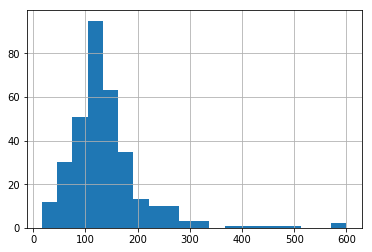

In [32]:
train_set_apr["LoanAmount"].hist(bins=20)

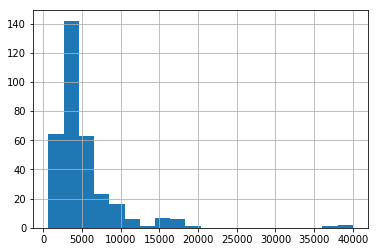

In [33]:
train_set_apr["ApplicantIncome"].hist(bins=20)

La mayoría de las personas que tienenun crédito aprobado son de ingresos bajos. Por tal motivo se observa que los montos de prestamo también son bajos.

9. Haz un boxplot para la cantidad del préstamo según el historial crediticio de la persona. ¿Hay diferencias en la cantidad prestada dependiendo si tiene historial o no? Repite el mismo boxplot pero ahora según el sexo. ¿Hay diferencias?

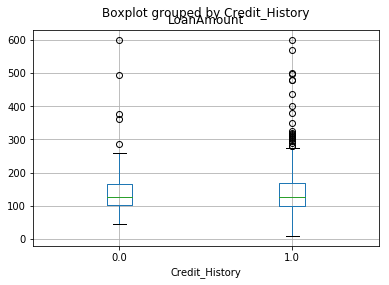

In [34]:
train_set.boxplot(column='LoanAmount',by="Credit_History")

Realmente no se observa ninguna diferencia del monto prestado entre las personas que ya cuentan con un historial crediticio y los que no. El primer cuartil, la mediana, el tercer cuartil y el máximo tienen los mismos niveles. El mínimo si es menor en las personas que tienen historial crediticio.

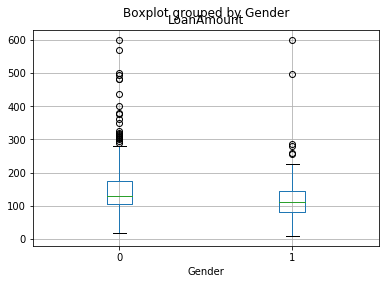

In [35]:
train_set.boxplot(column='LoanAmount',by="Gender")

Se observa una diferencia en cuanto a los montos de prestamo entre hombres y mujeres. Las mujeres tienen un monto menor de prestamo. Con base en el histograma donde vimos que a menor ingreso menor monto, podría explicar que las mujeres tienen menor ingreso que los hombres y por lo tanto menores montos de préstamo.